DAT340, Assignment 5

Romain THEODET

# Introduction

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGenerator = ImageDataGenerator(rescale=1.0 / 255.0)

# imgdir = "data"
imgdir = "/content/drive/MyDrive/FAC/M1/3rd_period/DAT340_Machine_Learning/labs/Assignment_5/data"
seed = 12345

imgSize = 64
batchSize = 32

trainGenerator = dataGenerator.flow_from_directory(
    imgdir + "/train",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)

validationGenerator = dataGenerator.flow_from_directory(
    imgdir + "/validation",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)


Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


# Part 1

In [27]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D


def make_convnet(width: int, height: int, channels: int) -> Model:
    model = Sequential([
        Conv2D(
            32,
            kernel_size=(5, 5),
            strides=(1, 1),
            activation="relu",
            input_shape=(width, height, channels)
        ), MaxPooling2D(
            pool_size=(2, 2),
            strides=(2, 2)
        ), Conv2D(
            64,
            (5, 5),
            activation="relu"
        ), MaxPooling2D(
            pool_size=(2, 2)
        ), Flatten(
        ), Dense(
            1000,  # 128 ?
            activation="relu"
        ), Dense(
            1,
            activation="sigmoid"
        ),
    ])

    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"],
    )

    return model


cnn = make_convnet(imgSize, imgSize, 3)

In [28]:
fitInfos = cnn.fit(
    trainGenerator,
    verbose=1,
    steps_per_epoch=50, # 1600 / 32
    validation_steps=18, # 576 / 32
    validation_data=validationGenerator,
    epochs=10,
    use_multiprocessing=True,
)


Epoch 1/10
50/50 [==============================] - 31s 604ms/step - loss: 0.7272 - accuracy: 0.6119 - val_loss: 0.6164 - val_accuracy: 0.6476
Epoch 2/10
50/50 [==============================] - 37s 732ms/step - loss: 0.5774 - accuracy: 0.7031 - val_loss: 0.5567 - val_accuracy: 0.7066
Epoch 3/10
50/50 [==============================] - 30s 578ms/step - loss: 0.5154 - accuracy: 0.7462 - val_loss: 0.5545 - val_accuracy: 0.7309
Epoch 4/10
50/50 [==============================] - 29s 571ms/step - loss: 0.4224 - accuracy: 0.8094 - val_loss: 0.4914 - val_accuracy: 0.7639
Epoch 5/10
50/50 [==============================] - 29s 577ms/step - loss: 0.3710 - accuracy: 0.8363 - val_loss: 0.6437 - val_accuracy: 0.7361
Epoch 6/10
50/50 [==============================] - 29s 576ms/step - loss: 0.3365 - accuracy: 0.8487 - val_loss: 0.6105 - val_accuracy: 0.7691
Epoch 7/10
50/50 [==============================] - 31s 595ms/step - loss: 0.3095 - accuracy: 0.8656 - val_loss: 0.5678 - val_accuracy: 0.7569

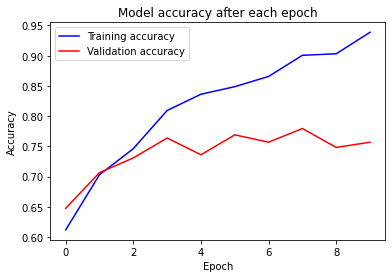

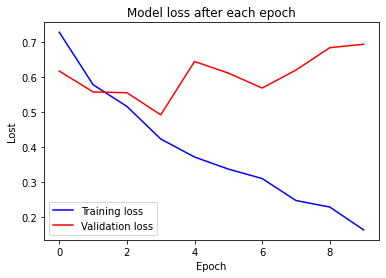

In [29]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fitInfos.epoch, fitInfos.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fitInfos.epoch, fitInfos.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()

plt.xlabel("Epoch")
plt.ylabel("Lost")
plt.title("Model loss after each epoch")
plt.plot(fitInfos.epoch, fitInfos.history["loss"], color="blue", label="Training loss")
plt.plot(fitInfos.epoch, fitInfos.history["val_loss"], color="red", label="Validation loss")
plt.legend()
plt.show()


# Part 2

In [32]:
augmentedDataGenerator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

augmentedTrainGenerator = augmentedDataGenerator.flow_from_directory(
    imgdir + "/train",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)

validationGenerator = dataGenerator.flow_from_directory(
    imgdir + "/validation",
    target_size=(imgSize, imgSize),
    batch_size=batchSize,
    class_mode="binary",
    classes=["other", "car"],
    seed=seed,
    shuffle=True
)


Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


In [33]:
fitInfosAugmented = cnn.fit(
    augmentedTrainGenerator,
    verbose=1,
    steps_per_epoch=50,
    validation_steps=18,
    validation_data=validationGenerator,
    epochs=10,
    use_multiprocessing=True
)


Epoch 1/10
50/50 [==============================] - 33s 642ms/step - loss: 0.5949 - accuracy: 0.7025 - val_loss: 0.5233 - val_accuracy: 0.7587
Epoch 2/10
50/50 [==============================] - 32s 631ms/step - loss: 0.5184 - accuracy: 0.7387 - val_loss: 0.5382 - val_accuracy: 0.7587
Epoch 3/10
50/50 [==============================] - 33s 634ms/step - loss: 0.4907 - accuracy: 0.7700 - val_loss: 0.4899 - val_accuracy: 0.7674
Epoch 4/10
50/50 [==============================] - 32s 630ms/step - loss: 0.4831 - accuracy: 0.7625 - val_loss: 0.5080 - val_accuracy: 0.7569
Epoch 5/10
50/50 [==============================] - 32s 630ms/step - loss: 0.4614 - accuracy: 0.7875 - val_loss: 0.5082 - val_accuracy: 0.7604
Epoch 6/10
50/50 [==============================] - 32s 625ms/step - loss: 0.5009 - accuracy: 0.7569 - val_loss: 0.4687 - val_accuracy: 0.7847
Epoch 7/10
50/50 [==============================] - 32s 636ms/step - loss: 0.4601 - accuracy: 0.7738 - val_loss: 0.4592 - val_accuracy: 0.7865

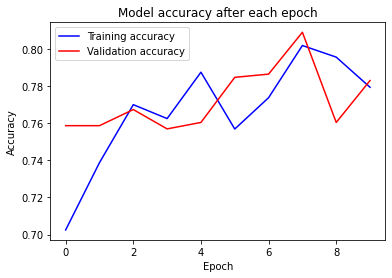

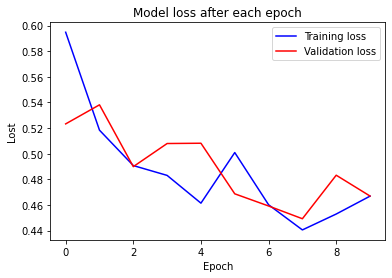

In [34]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()

plt.xlabel("Epoch")
plt.ylabel("Lost")
plt.title("Model loss after each epoch")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["loss"], color="blue", label="Training loss")
plt.plot(fitInfosAugmented.epoch, fitInfosAugmented.history["val_loss"], color="red", label="Validation loss")
plt.legend()
plt.show()


# Part 2: interlude